In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# len(cities)

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mitsamiouli
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | wasco
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set 1 | 

Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | ketchikan
Processing Record 43 of Set 4 | hokitika
Processing Record 44 of Set 4 | skibbereen
Processing Record 45 of Set 4 | marsaxlokk
Processing Record 46 of Set 4 | banjar
Processing Record 47 of Set 4 | roald
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | hasaki
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | ahuimanu
Processing Record 3 of Set 5 | viedma
Processing Record 4 of Set 5 | asuncion
Processing Record 5 of Set 5 | messina
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | moose factory
Processing Record 9 of Set 5 | saint-georges
Processing Record 10 of Set 5 | arraial do cabo
Processing Record 11 of Set 5 | mount gambier
Processing Record 12 of Set 5 | cap malheureux
Processing Record 13 of Set 5 |

Processing Record 27 of Set 8 | virginia beach
Processing Record 28 of Set 8 | sao filipe
Processing Record 29 of Set 8 | faanui
Processing Record 30 of Set 8 | labuhan
Processing Record 31 of Set 8 | progreso
Processing Record 32 of Set 8 | neiafu
Processing Record 33 of Set 8 | kununurra
Processing Record 34 of Set 8 | vicuna
Processing Record 35 of Set 8 | tazovskiy
Processing Record 36 of Set 8 | kupang
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | phalodi
Processing Record 39 of Set 8 | manta
Processing Record 40 of Set 8 | puerto escondido
Processing Record 41 of Set 8 | kolokani
Processing Record 42 of Set 8 | marsh harbour
Processing Record 43 of Set 8 | boquira
Processing Record 44 of Set 8 | tiksi
Processing Record 45 of Set 8 | andrelandia
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | boyolangu
Processing Record 48 of Set 8 | saleaula
City not found. Skipping...
Processing Record 49 of Set 8 | nizhnevartovsk
Processing Record 50

Processing Record 17 of Set 12 | mrirt
City not found. Skipping...
Processing Record 18 of Set 12 | along
Processing Record 19 of Set 12 | vardo
Processing Record 20 of Set 12 | ostrovnoy
Processing Record 21 of Set 12 | tibu
Processing Record 22 of Set 12 | tabialan
City not found. Skipping...
Processing Record 23 of Set 12 | alexandria
Processing Record 24 of Set 12 | zakupne
Processing Record 25 of Set 12 | balaipungut
Processing Record 26 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 27 of Set 12 | snezhnogorsk
Processing Record 28 of Set 12 | boquete
Processing Record 29 of Set 12 | angoche
Processing Record 30 of Set 12 | katangli
Processing Record 31 of Set 12 | marzuq
Processing Record 32 of Set 12 | traralgon
Processing Record 33 of Set 12 | kostryzhivka
Processing Record 34 of Set 12 | samarai
Processing Record 35 of Set 12 | port hardy
Processing Record 36 of Set 12 | gravdal
Processing Record 37 of Set 12 | dunda
Processing Record 38 of Set 12 | tu

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,62.78,73,1,2.77,TL,2020-11-06 22:25:54
1,Ponta Do Sol,32.67,-17.10,62.60,63,20,5.82,PT,2020-11-06 22:25:54
2,Busselton,-33.65,115.33,59.00,58,40,11.01,AU,2020-11-06 22:25:55
3,Mitsamiouli,-11.38,43.28,78.49,77,76,8.66,KM,2020-11-06 22:25:55
4,Norman Wells,65.28,-126.83,5.00,92,75,4.70,CA,2020-11-06 22:25:55


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2020-11-06 22:25:54,-8.93,125.41,62.78,73,1,2.77
1,Ponta Do Sol,PT,2020-11-06 22:25:54,32.67,-17.10,62.60,63,20,5.82
2,Busselton,AU,2020-11-06 22:25:55,-33.65,115.33,59.00,58,40,11.01
3,Mitsamiouli,KM,2020-11-06 22:25:55,-11.38,43.28,78.49,77,76,8.66
4,Norman Wells,CA,2020-11-06 22:25:55,65.28,-126.83,5.00,92,75,4.70


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# today

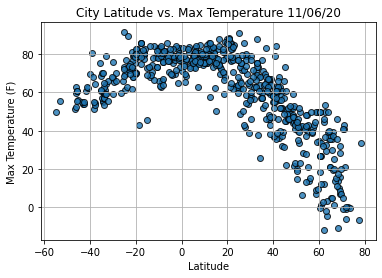

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

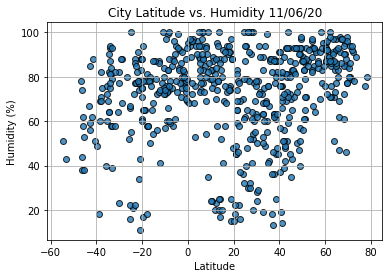

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

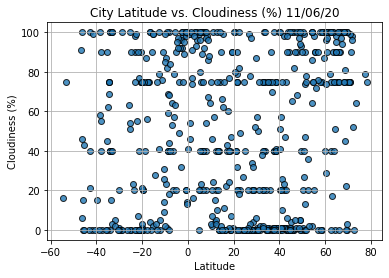

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

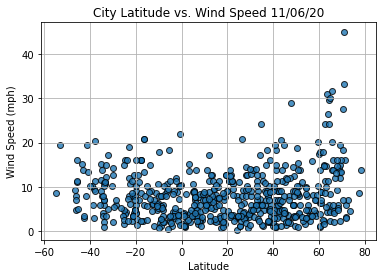

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()